In [6]:
from sklearn.datasets import fetch_california_housing

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
california=fetch_california_housing()

In [9]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [11]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [12]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
california.data.shape

(20640, 8)

In [14]:
california.target_names

['MedHouseVal']

In [15]:
#Lets prepare the dataset
df=pd.DataFrame(california.data,columns=california.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
df['Price']=california.target

In [17]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [19]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [20]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

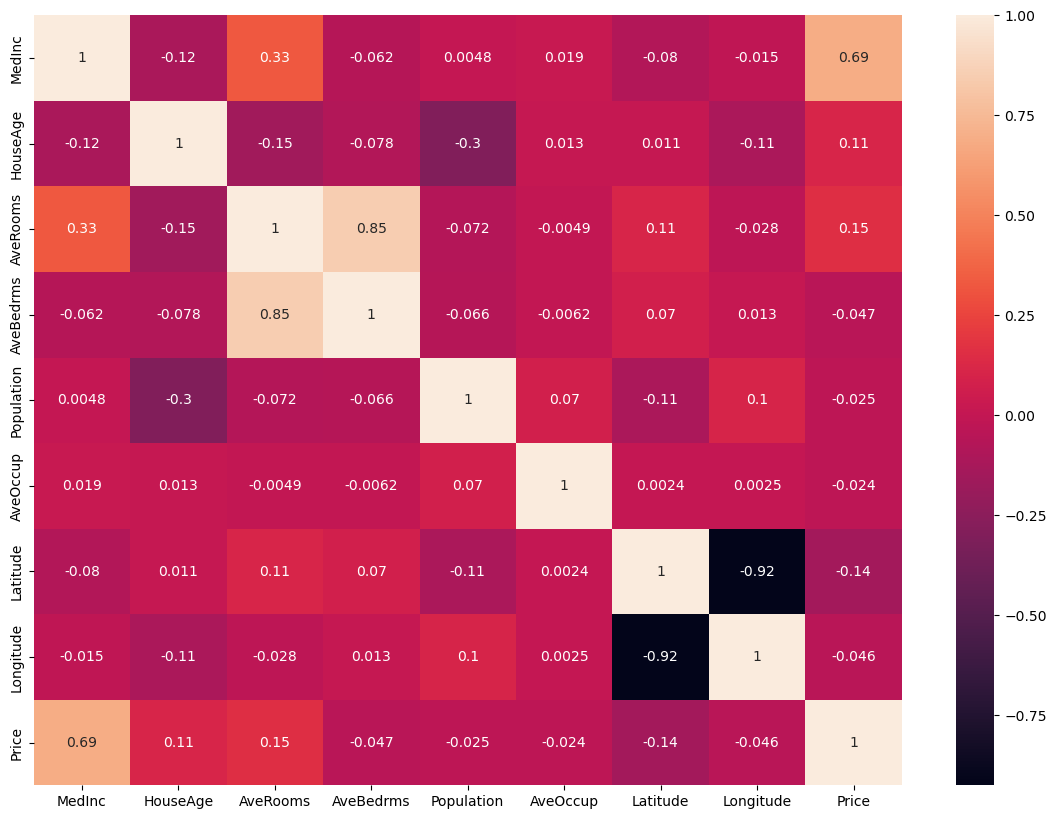

In [22]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

In [23]:
#dividing the dataset into dependent and independent features

X=df.iloc[:,:-1]

In [24]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
y=df['Price']

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [29]:
#scaling done for better convergance ang optimization

from sklearn.preprocessing import StandardScaler

In [30]:
Scaler=StandardScaler()

In [31]:
X_train=Scaler.fit_transform(X_train)

In [32]:
X_test=Scaler.transform(X_test)

In [33]:
X_train

array([[ 0.81227025, -0.44350528, -0.16664269, ...,  0.06494541,
         0.83999711, -1.14723656],
       [ 0.04888899,  1.85414996, -0.1036322 , ...,  0.0707951 ,
         0.96603327, -1.42642929],
       [-0.43087659, -0.91888223, -0.0179501 , ..., -0.03826408,
         1.0733974 , -0.35452862],
       ...,
       [ 0.88328   , -1.79040663, -0.21306094, ...,  0.09864017,
         0.78398104, -1.1023663 ],
       [-0.87751839,  0.50724861, -1.09265745, ...,  0.19023936,
        -0.7751329 ,  0.6725018 ],
       [-0.62861387, -0.99811172, -0.60143478, ..., -0.08497825,
         0.77464503, -1.14723656]])

In [34]:
X_test

array([[ 0.74819216, -1.31502968, -0.39222127, ...,  0.12988191,
        -0.69110879,  0.19887127],
       [ 0.05709056, -0.12658732, -0.32972259, ..., -0.12178848,
         0.89134518, -1.36161669],
       [ 0.34134121, -1.31502968, -0.40838673, ..., -0.15817572,
        -0.91984108,  0.90183869],
       ...,
       [ 0.42457395, -1.47348867,  0.36148407, ..., -0.03382702,
         0.80732107, -0.50908174],
       [ 0.41452041,  0.74493708, -0.15924856, ..., -0.07517121,
        -1.40064567,  1.25082961],
       [-0.72190015, -0.83965274, -0.52666029, ...,  0.28998433,
         0.50390069, -0.54398083]])

MODEL TRAIN

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
Regressor=LinearRegression()

In [37]:
Regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
Regressor.coef_

array([ 0.83329476,  0.12211856, -0.28024737,  0.33652609,  0.00148665,
       -0.02868206, -0.92659537, -0.89282551])

In [39]:
Regressor.intercept_

2.0666131402270147

In [40]:
y_pred=Regressor.predict(X_test)

In [41]:
y_pred

array([3.00818422, 2.58387257, 2.35282009, ..., 1.78941655, 2.58881603,
       1.44575813])

In [42]:
#Cost function...

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5540440300082567
0.5370779294017782
0.7443413397146881


In [43]:
#Rsquare and adjusted r square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.5913048824900673


In [44]:
#Adjusted r_square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5907760840200561

In [52]:
#We use pickling concept for to save model so that we can deploy the model...

import pickle
pickle.dump(Scaler,open('scaled_data.pkl','wb'))
pickle.dump(Regressor,open('regression.pkl','wb'))

In [53]:
model_regressor=pickle.load(open('regression.pkl','rb'))
model_regressor.predict(X_test)

array([3.00818422, 2.58387257, 2.35282009, ..., 1.78941655, 2.58881603,
       1.44575813])